In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Membaca Data
data = pd.read_csv('transaksi.csv')  # Ganti dengan nama file Anda
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id,usia,jk,golda,jumlah,Unnamed: 5,Unnamed: 6
0,1371DGJON000403,60,0,B,1,NaN,NaN
1,1371DGSUK000180,57,0,O,1,NaN,NaN
2,1371DGAGU000775,56,0,B,1,NaN,NaN
3,1371DGZUL001027,54,0,AB,1,NaN,NaN
4,1371DGSIS000140,53,1,O,1,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56001 entries, 0 to 56000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          56001 non-null  object 
 1   usia        56001 non-null  int64  
 2   jk          56001 non-null  int64  
 3   golda       56001 non-null  object 
 4   jumlah      56001 non-null  int64  
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  4 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.0+ MB


In [ ]:
data["jk"] = data["jk"].map({0: 1, 1: 2})
data.drop(columns=["id", "golda"], inplace=True)
data = data.drop(['Unnamed: 6'], axis=1)
data = data.drop(['Unnamed: 5'], axis=1)
data.head()

,usia,jk,jumlah
0,60,1,1
1,57,1,1
2,56,1,1
3,54,1,1
4,53,2,1


In [ ]:
print(data)

       usia  jk  jumlah
0        60   1       1
1        57   1       1
2        56   1       1
3        54   1       1
4        53   2       1
...     ...  ..     ...
55996    71   1     197
55997    54   1       1
55998    42   1       1
55999    27   1       1
56000    21   2       1

[56001 rows x 3 columns]


In [ ]:
# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

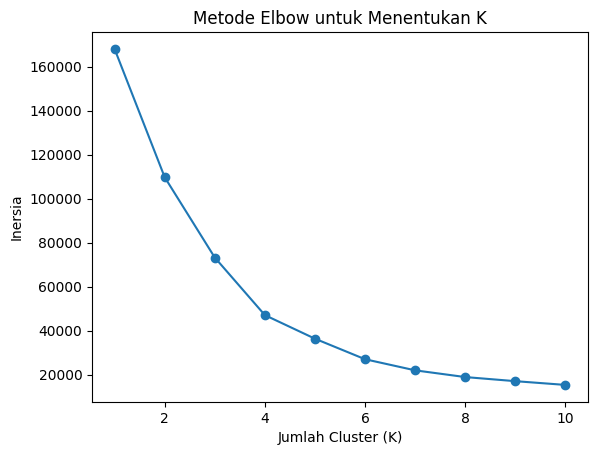

In [ ]:
# Menentukan jumlah cluster (K) dengan metode elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inersia")
plt.title("Metode Elbow untuk Menentukan K")
plt.show()

In [ ]:
# Penerapan K-means dengan K yang telah ditentukan
kmeans_final = KMeans(n_clusters=6, random_state=42)
data["cluster"] = kmeans_final.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Data dengan kolom cluster
print(data.head())

   usia  jk  jumlah  cluster
0    60   1       1        0
1    57   1       1        0
2    56   1       1        0
3    54   1       1        0
4    53   2       1        2


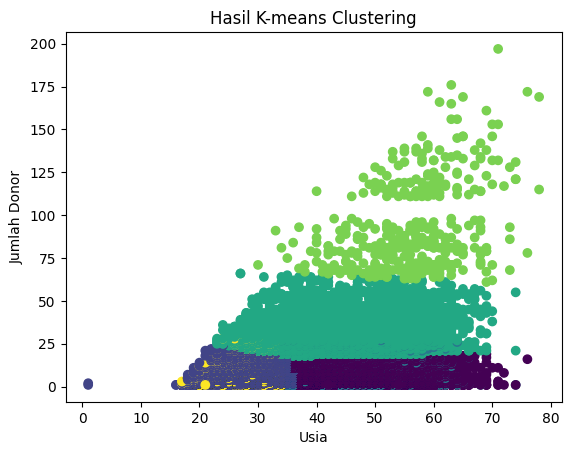

In [ ]:
# 7. (Optional) Visualisasi hasil clustering
plt.scatter(data["usia"], data["jumlah"], c=data["cluster"], cmap="viridis")
plt.xlabel("Usia")
plt.ylabel("Jumlah Donor")
plt.title("Hasil K-means Clustering")
plt.show()

In [ ]:
# Evaluasi dengan indeks Silhouette
silhouette_avg = silhouette_score(data_scaled, data["cluster"])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.56
